In [22]:
import tensorflow as tf
import os
import pathlib
import time
import matplotlib.pyplot as plt
from IPython import display

In [2]:
!pip install -q -U tensorboard

     |████████████████████████████████| 5.8 MB 4.3 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.2+zzzcolab20220719082949 requires tensorboard<2.9,>=2.8, but you have tensorboard 2.9.1 which is incompatible.


# # Pix2Pix
---
- 이 노트북은 Conditional Adversarial Networks를 사용한 이미지 간 변환에서 설명한 대로 조건부 GAN을 사용한 이미지간 변환을 보여줍니다. 이 기법을 사용하여 흑백 사진을 채색하고, 구글 지도를 구글 어스로 변환하는 등의 작업을 수행할 수 있습니다. 여기서는 건물 정면을 실제 건물로 변환합니다.

- 예제에서는 프라하 체코 공과대학의 기계 인식 센터에서 제공하는 CMP Facade Database를 사용할 것입니다. 예제를 간략하게 유지하기 위해 위의 논문 작성자가 만든 이 데이터세트의 전처리된 사본을 사용합니다.

## # 데이터 로드
---
- 훈련 데이터세트에 무작위 지터링 및 미러링을 적용합니다.
- 무작위 지터링에서 이미지의 크기는 286 x 286로 조정되고 256 x 256로 무작위로 잘립니다.
- 무작위 미러링에서는 이미지가 좌우로 무작위로 뒤집힙니다.

In [19]:
dataset_name = "facades" #@param ["cityscapes", "edges2handbags", "edges2shoes", "facades", "maps", "night2day"]

In [23]:
_URL = f'http://efrosgans.eecs.berkeley.edu/pix2pix/datasets/{dataset_name}.tar.gz'

path_to_zip = tf.keras.utils.get_file(
    fname=f"{dataset_name}.tar.gz",
    origin=_URL,
    extract=True)

path_to_zip  = pathlib.Path(path_to_zip)

PATH = str(path_to_zip.parent/dataset_name) + '/'

In [40]:
BUFFER_SIZE = 400
BATCH_SIZE = 1
IMG_WIDTH = 256
IMG_HEIGHT = 256

In [28]:
def load(image_file):
  image = tf.io.read_file(image_file)
  image = tf.image.decode_jpeg(image)

  w = tf.shape(image)[1]

  w = w // 2
  real_image = image[:, :w, :]
  input_image = image[:, w:, :]

  input_image = tf.cast(input_image, tf.float32)
  real_image = tf.cast(real_image, tf.float32)

  return input_image, real_image

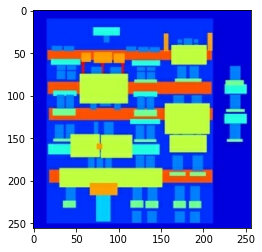

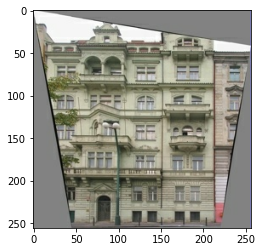

In [39]:
inp, re = load(PATH + 'train/100.jpg')
# casting to int for matplotlib to show the image
plt.figure()
plt.imshow(inp/255.0)
plt.figure()
plt.imshow(re/255.0)